# Time Indexed Files `F-14`

In [1]:
cd ~/Desktop/Tesis/Notebooks-Git

/home/luis/Desktop/Tesis/Notebooks-Git


In [2]:
import Script as sc

In [3]:
cd ~/Desktop/Tesis/F14

/home/luis/Desktop/Tesis/F14


In [4]:
ls

15-9-f-14_nr_002_MWD_DD_EOWR.pdf  WL_RAW_BHPR-GR-MECH_TIME_MWD_1-3_INF_1.ASC
CSVs/                             WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS
FWR_Drilling_F14.pdf              WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS
trajectory/                       WL_RAW_BHPR-GR-MECH_TIME_MWD_3.LAS


In [5]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [6]:
files = os.listdir()
files = [s for s in files if ".LAS" in s]
files.sort()
files

['WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS',
 'WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS',
 'WL_RAW_BHPR-GR-MECH_TIME_MWD_3.LAS']

In [7]:
dfs = []
for elements in files:
    df = sc.time_indexed_LAS(elements)
    dfs.append(df)

File: WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS 

Total rows :  39414
Columns:
 ['DEPT' 'ROP5' 'ARC_GR_UNC_RT' 'BPOS' 'BVEL' 'SWOB' 'HKLD' 'TQA' 'RPM'
 'Stick_RT' 'CRPM_RT' 'TFLO' 'TRPM_RT' 'SPPA' 'SHKRSK_RT' 'SHK2_RT'
 'SHK_ISONIC_RT' 'PDSHKRSK' 'SHKPK_RT' 'ECD_ARC' 'APRS_ARC' 'ATMP' 'BDTI'
 'DateTime']
Initial depth: 0.0
Initial date: 10-May-2008
DeltaTime: 0 days 00:00:10 


File: WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS 

Total rows :  24841
Columns:
 ['DEPT' 'ROP5' 'ARC_GR_RT' 'BPOS' 'BVEL' 'HKLD' 'SWOB' 'TQA' 'RPM'
 'Stick_RT' 'SHKRSK_RT' 'SHK2_RT' 'SPPA' 'TFLO' 'TRPM_RT' 'ECD_ARC'
 'APRS_ARC' 'ATMP' 'SPM1' 'SPM2' 'SPM3' 'DateTime']
Initial depth: 150.1291
Initial date: 21-May-2008
DeltaTime: 0 days 00:00:10 


File: WL_RAW_BHPR-GR-MECH_TIME_MWD_3.LAS 

Total rows :  33583
Columns:
 ['DEPT' 'ROP5' 'GRMA_BHC_RT' 'HKLD' 'SPPA' 'CRS_CNINC' 'INCL_CONT_RT'
 'SWOB' 'TQA' 'CRPM_RT' 'RPM' 'Stick_RT' 'SHKRSK_RT' 'SHKPK_RT' 'BPOS'
 'BVEL' 'DHAT' 'TFLO' 'ECD' 'DHAP' 'TRPM_RT' 'SPM1' 'SPM2' 'SPM3'
 'Date

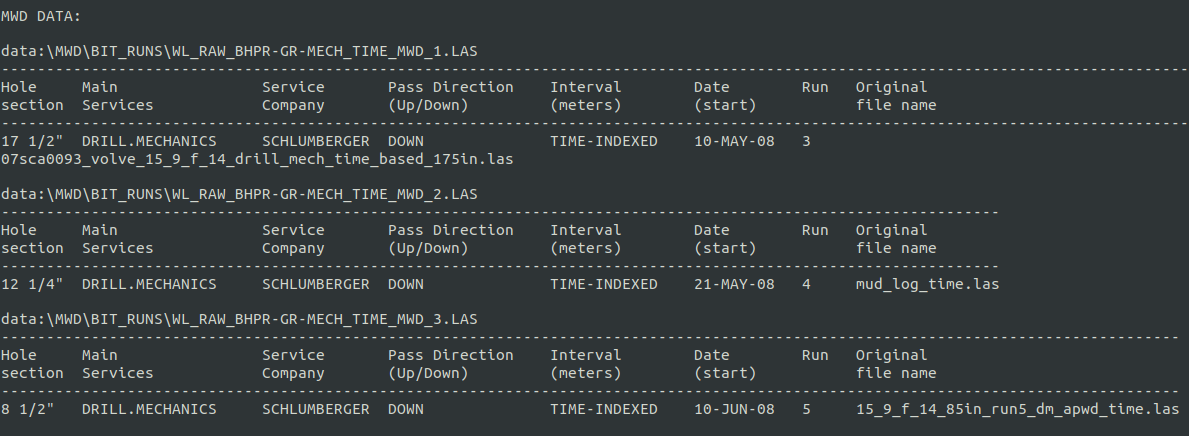

In [8]:
run_3 = dfs[0]
run_4 = dfs[1]
run_5 = dfs[2]

In [9]:
runs = [run_3,run_4,run_5]
runs_txt = ["run_3","run_4","run_5"]
sections  =  ['17 1/2"','12 1/4"','8 1/2"']
info = list(zip(runs_txt,sections))

In [10]:
list(zip(files,info))

[('WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS', ('run_3', '17 1/2"')),
 ('WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS', ('run_4', '12 1/4"')),
 ('WL_RAW_BHPR-GR-MECH_TIME_MWD_3.LAS', ('run_5', '8 1/2"'))]

## Drilling events 

Plot: run_3 	Section: 17 1/2"


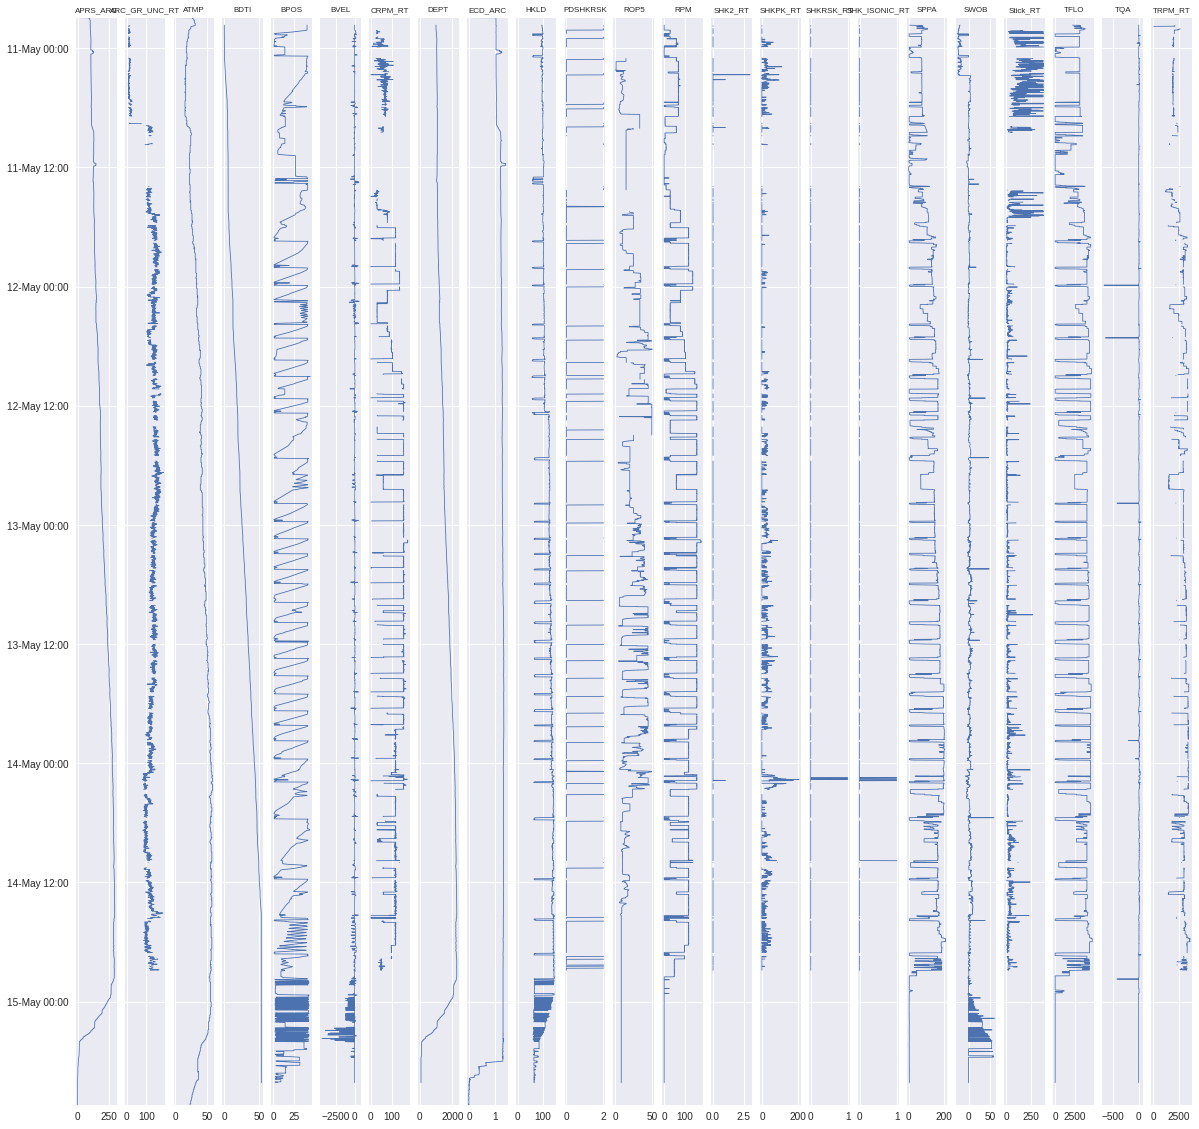




Plot: run_4 	Section: 12 1/4"


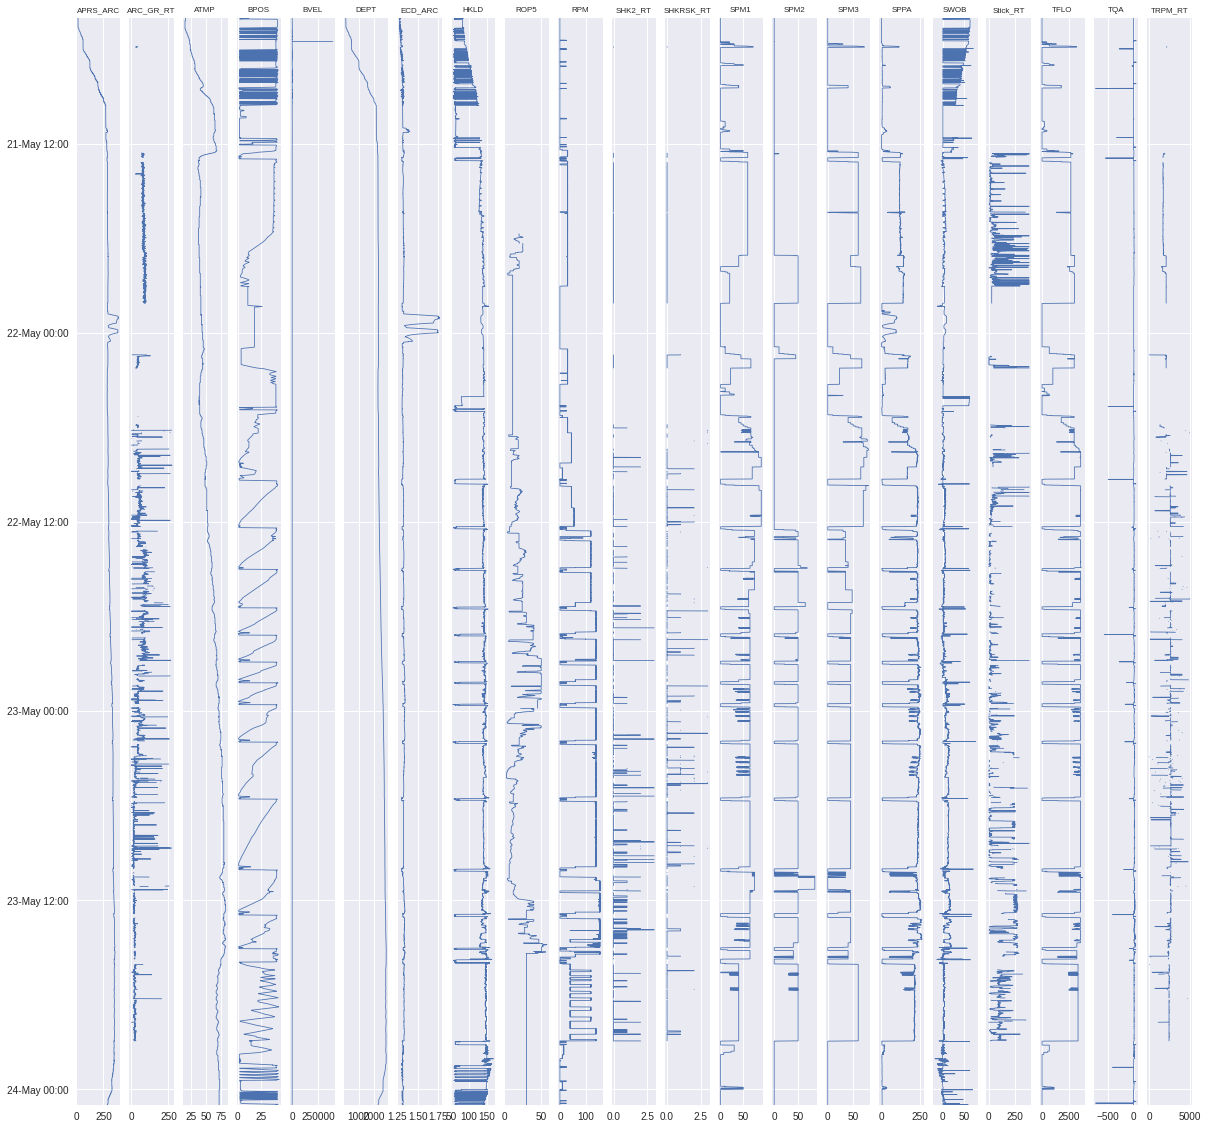




Plot: run_5 	Section: 8 1/2"


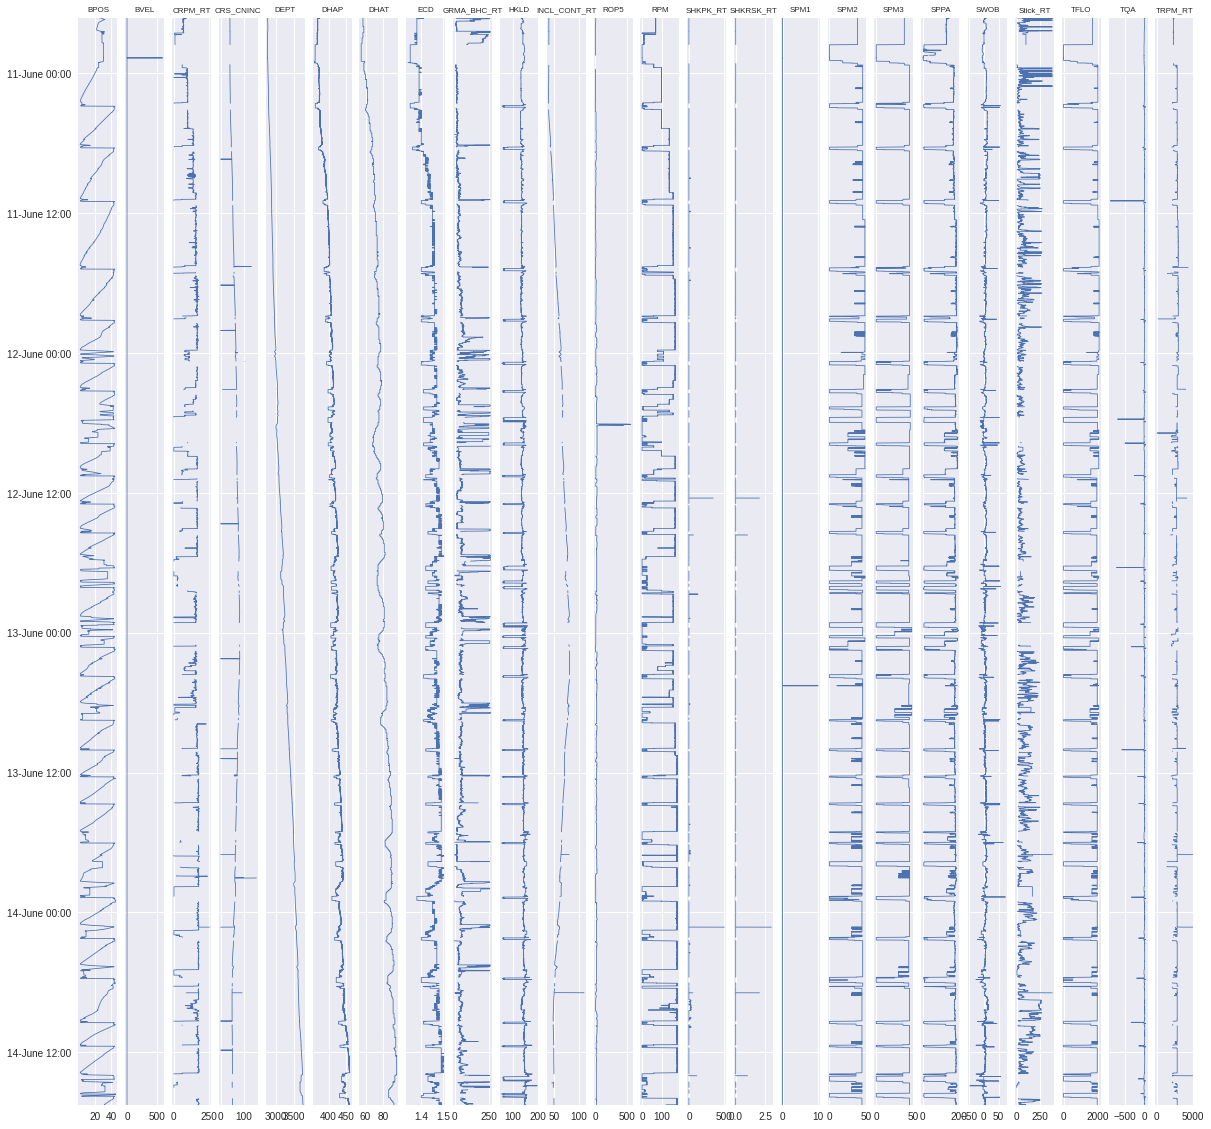

In [11]:
i = 0
for run in runs:
    sc.well_plt(run,info[i])
    i+=1

Plot: run_3 	Section: 17 1/2"


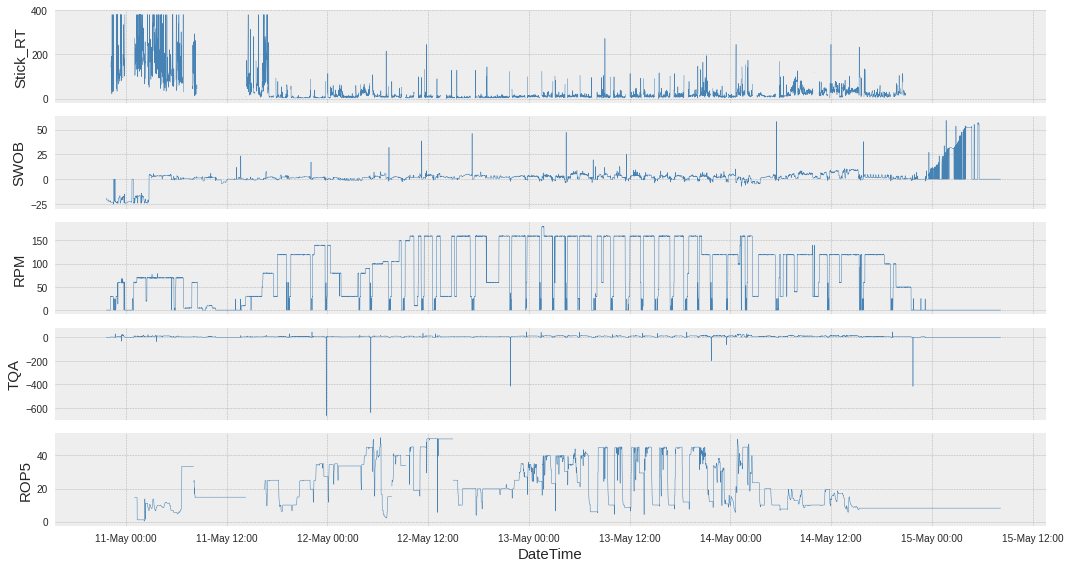

In [12]:
sc.time_plts(["Stick_RT","SWOB","RPM","TQA","ROP5"],runs[0],info[0])

## Date range selector

In [13]:
import ipywidgets as widgets
def print_date_range(date_range):
    global inf ;  inf = date_range[0]
    global sup ;  sup = date_range[1]
    return(inf,sup)   
def date_slider(data):
    dates = data.set_index("DateTime").index ; options = [(date.strftime('%d %m %H:%M'), date) for date in dates] ; index = (0, len(options)-1)
    selection_date_slider = widgets.SelectionRangeSlider(options=options,index=index,orientation='horizontal',layout={'width': '500px'},description="Date Selector")    
    widgets.interact(print_date_range,date_range=selection_date_slider)

In [14]:
date_slider(runs[0])

interactive(children=(SelectionRangeSlider(description='Date Selector', index=(0, 39412), layout=Layout(width=…

Plot: run_3 	Section: 17 1/2"


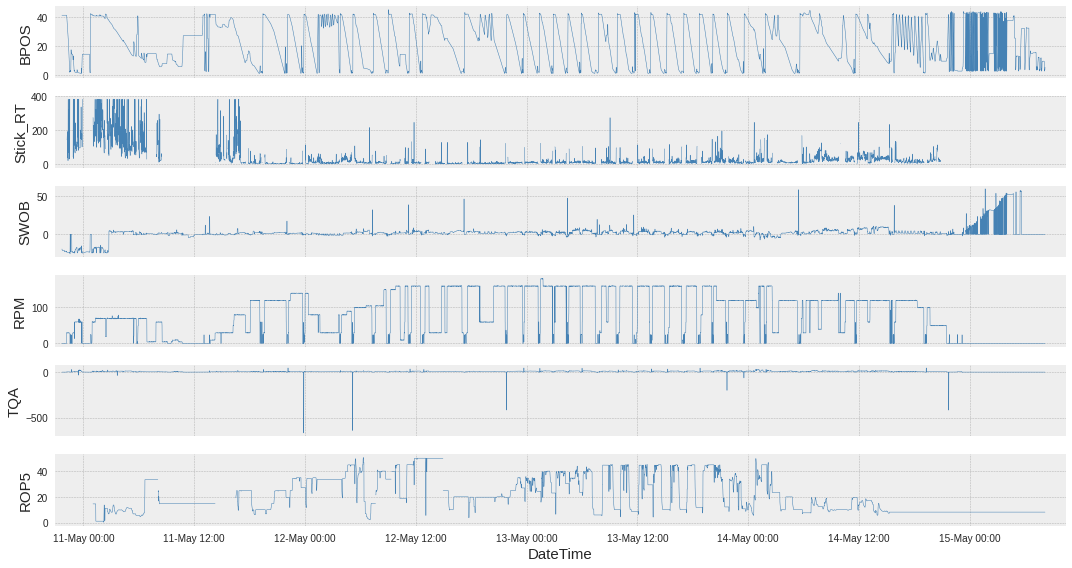

In [15]:
sc.date_plts(["BPOS","Stick_RT","SWOB","RPM","TQA","ROP5"],runs[0],info[0],inf,sup)

## Well identifier and section

In [16]:
i = 0 
for run in runs:
    run["Well"] = "F-14"
    run["Run"] = runs_txt[i]
    i+=1

## Drilling Sections 

In [17]:
list(zip(info,files))

[(('run_3', '17 1/2"'), 'WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS'),
 (('run_4', '12 1/4"'), 'WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS'),
 (('run_5', '8 1/2"'), 'WL_RAW_BHPR-GR-MECH_TIME_MWD_3.LAS')]

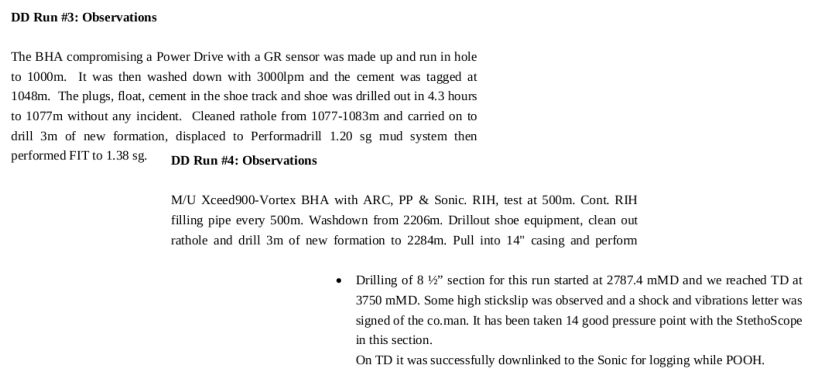
`15-9-f-14_nr_002_MWD_DD_EOWR.pdf`

In [18]:
depths = [1083,2284,2787.4]


Plot: run_3 	Section: 17 1/2"


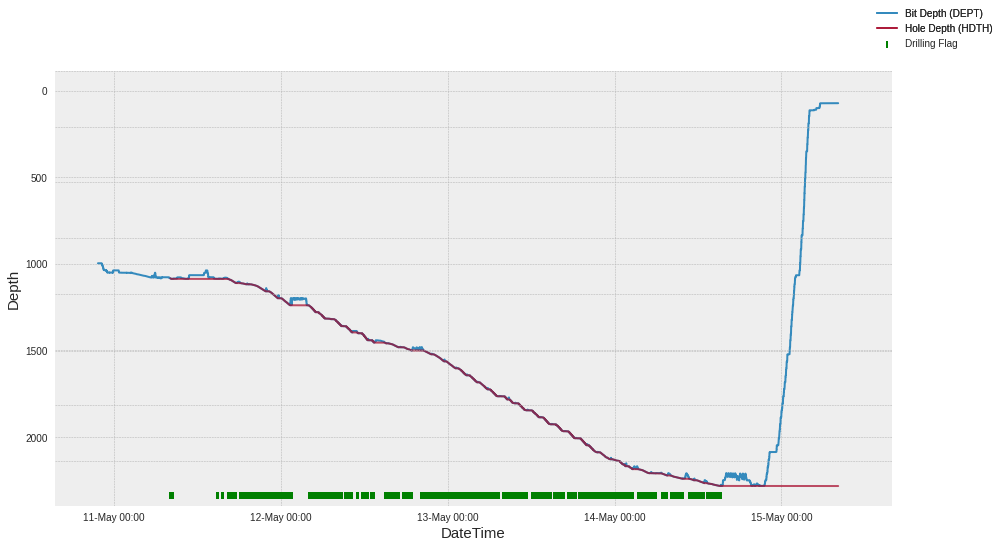


Plot: run_4 	Section: 12 1/4"


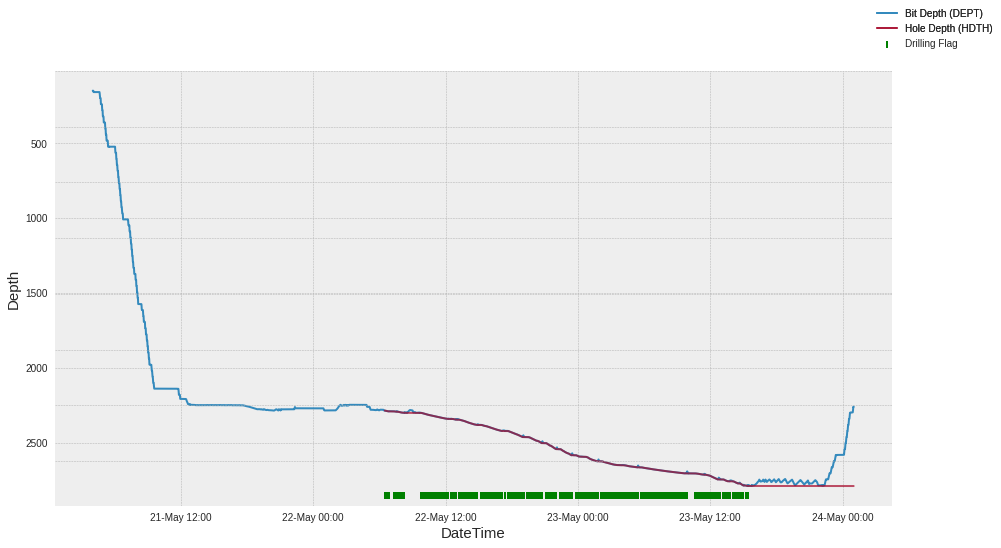


Plot: run_5 	Section: 8 1/2"


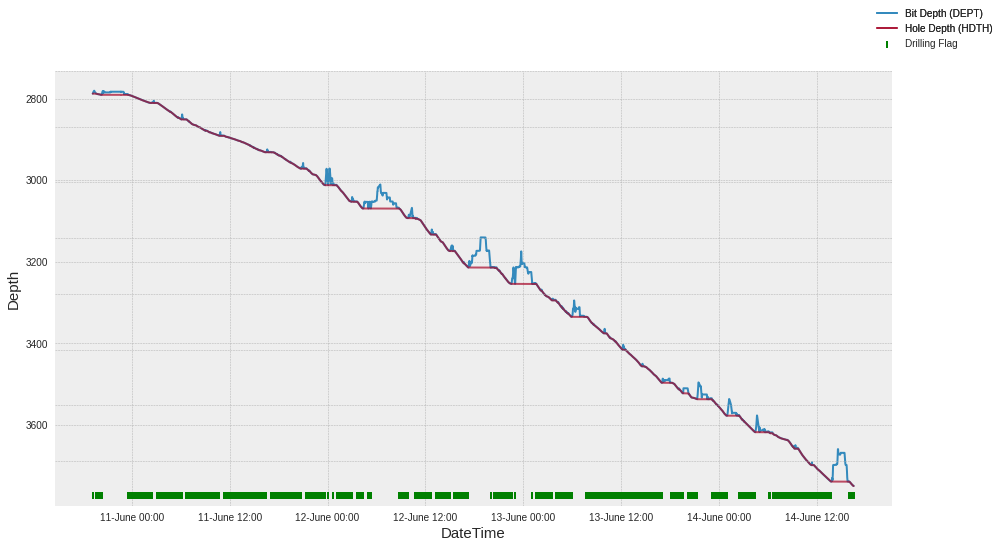

In [19]:
drill_op = []
i = 0
for run in runs:
    df = sc.drilling_process_fell(run,depths[i])
    sc.drill_flag(df,info[i])
    df = df[df["Flag"]==1]
    drill_op.append(df)
    i+=1    

## Drilling analysis

In [20]:
runs[0].columns

Index(['DEPT', 'ROP5', 'ARC_GR_UNC_RT', 'BPOS', 'BVEL', 'SWOB', 'HKLD', 'TQA',
       'RPM', 'Stick_RT', 'CRPM_RT', 'TFLO', 'TRPM_RT', 'SPPA', 'SHKRSK_RT',
       'SHK2_RT', 'SHK_ISONIC_RT', 'PDSHKRSK', 'SHKPK_RT', 'ECD_ARC',
       'APRS_ARC', 'ATMP', 'BDTI', 'DateTime', 'Well', 'Run', 'HDTH', 'BONB',
       'Flag'],
      dtype='object')

In [21]:
date_slider(runs[0])

interactive(children=(SelectionRangeSlider(description='Date Selector', index=(0, 39412), layout=Layout(width=…

Plot: run_3 	Section: 17 1/2"


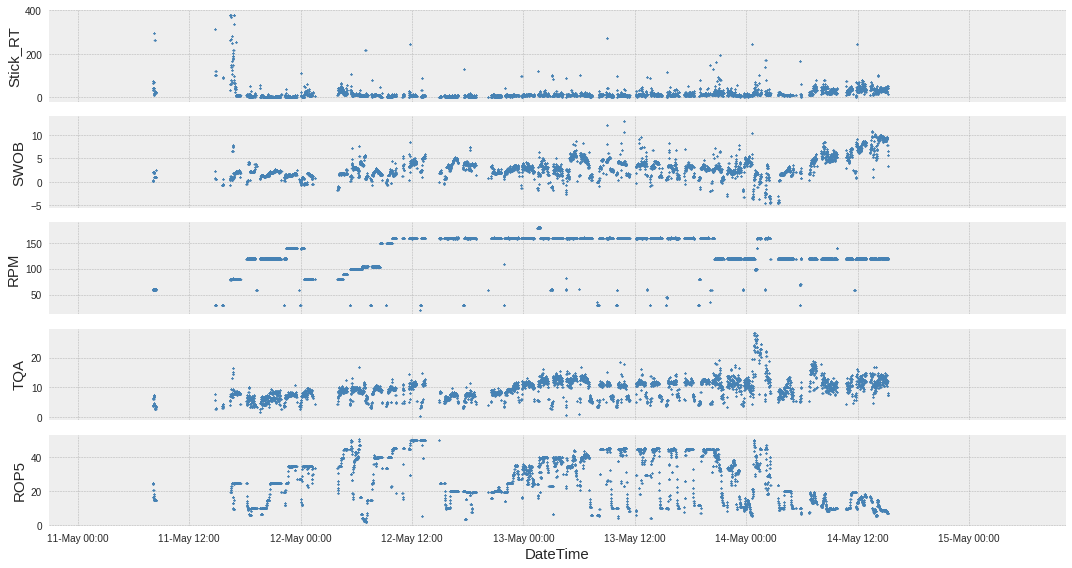

In [22]:
sc.date_scatter_plts(["Stick_RT","SWOB","RPM","TQA","ROP5"],drill_op[0],info[0],inf,sup)

## `csv`files

In [23]:
info

[('run_3', '17 1/2"'), ('run_4', '12 1/4"'), ('run_5', '8 1/2"')]

In [24]:
filepath = "/home/luis/Desktop/Tesis/F14/CSVs"

In [25]:
i = 3 
for file in drill_op:
    file.to_csv(filepath+"/run_"+str(i)+".csv",index=False)
    i+=1